In [1]:
import requests, pandas, numpy
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [2]:
url = "https://blockchain.info/charts/market-price?timespan=1year&format=json"

response = requests.get(url).json()

dataset = [{
    'date': datetime.utcfromtimestamp(int(data['x'])).strftime('%d-%m-%Y'),
    'price': round(data['y'], 2)
} for data in response['values']]

print(dataset)

[{'date': '26-02-2019', 'price': 3848.33}, {'date': '27-02-2019', 'price': 3831.45}, {'date': '28-02-2019', 'price': 3833.23}, {'date': '01-03-2019', 'price': 3850.08}, {'date': '02-03-2019', 'price': 3834.62}, {'date': '03-03-2019', 'price': 3831.44}, {'date': '04-03-2019', 'price': 3814.58}, {'date': '05-03-2019', 'price': 3730.98}, {'date': '06-03-2019', 'price': 3872.25}, {'date': '07-03-2019', 'price': 3876.85}, {'date': '08-03-2019', 'price': 3886.82}, {'date': '09-03-2019', 'price': 3875.96}, {'date': '10-03-2019', 'price': 3950.56}, {'date': '11-03-2019', 'price': 3928.17}, {'date': '12-03-2019', 'price': 3881.09}, {'date': '13-03-2019', 'price': 3892.51}, {'date': '14-03-2019', 'price': 3877.77}, {'date': '15-03-2019', 'price': 3885.21}, {'date': '16-03-2019', 'price': 3936.5}, {'date': '17-03-2019', 'price': 4015.95}, {'date': '18-03-2019', 'price': 3994.92}, {'date': '19-03-2019', 'price': 3998.77}, {'date': '20-03-2019', 'price': 4029.11}, {'date': '21-03-2019', 'price': 40

In [3]:
df = pandas.DataFrame(dataset)

df.drop('date', axis = 1, inplace = True)

## Predicting N Days out into the Future.
prediction_days = 30

## Shifted N Units Up!
df['prediction'] = df[['price']].shift(-prediction_days)

In [4]:
## Create Independaent DataSet.
## Convert DataFrame to Numpy Array and Drop Prediction Column.
X = numpy.array(df.drop(['prediction'], 1))

## Remove the Last N rows Where N is Prediction Days.
X = X[ : len(df) - prediction_days]

X

array([[ 3848.33],
       [ 3831.45],
       [ 3833.23],
       [ 3850.08],
       [ 3834.62],
       [ 3831.44],
       [ 3814.58],
       [ 3730.98],
       [ 3872.25],
       [ 3876.85],
       [ 3886.82],
       [ 3875.96],
       [ 3950.56],
       [ 3928.17],
       [ 3881.09],
       [ 3892.51],
       [ 3877.77],
       [ 3885.21],
       [ 3936.5 ],
       [ 4015.95],
       [ 3994.92],
       [ 3998.77],
       [ 4029.11],
       [ 4056.4 ],
       [ 3992.34],
       [ 3999.06],
       [ 4011.92],
       [ 3994.11],
       [ 3935.89],
       [ 3947.74],
       [ 4048.51],
       [ 4037.37],
       [ 4115.55],
       [ 4114.44],
       [ 4114.16],
       [ 4152.53],
       [ 4882.88],
       [ 4959.81],
       [ 4911.24],
       [ 5028.77],
       [ 5053.52],
       [ 5189.39],
       [ 5268.71],
       [ 5175.81],
       [ 5310.18],
       [ 5035.02],
       [ 5072.85],
       [ 5064.62],
       [ 5152.51],
       [ 5036.18],
       [ 5196.65],
       [ 5220.37],
       [ 527

In [5]:
## Create Dependaent DataSet.
## Convert DataFrame to Numpy Array.
y = numpy.array(df['prediction'])

## Get ALL the Values Except the Last N rows.
y = y[ : - prediction_days]

y

array([ 4048.51,  4037.37,  4115.55,  4114.44,  4114.16,  4152.53,
        4882.88,  4959.81,  4911.24,  5028.77,  5053.52,  5189.39,
        5268.71,  5175.81,  5310.18,  5035.02,  5072.85,  5064.62,
        5152.51,  5036.18,  5196.65,  5220.37,  5276.31,  5277.04,
        5309.28,  5281.83,  5377.19,  5518.16,  5434.19,  5195.61,
        5292.83,  5280.19,  5301.29,  5260.65,  5269.79,  5326.67,
        5390.16,  5657.14,  5771.08,  5717.66,  5684.47,  5755.72,
        5936.72,  6146.91,  6348.02,  7248.31,  6978.63,  7823.11,
        7992.69,  8206.9 ,  7885.96,  7362.22,  7265.05,  8193.7 ,
        8007.03,  7952.5 ,  7625.93,  7880.29,  8003.26,  8071.45,
        8744.42,  8770.06,  8719.88,  8662.98,  8272.46,  8553.81,
        8554.8 ,  8739.03,  8134.92,  7675.8 ,  7786.04,  7803.23,
        7998.29,  7931.34,  7640.61,  8020.38,  7917.58,  8173.06,
        8237.88,  8693.6 ,  8859.47,  8978.99,  9327.48,  9076.18,
        9281.7 ,  9531.35, 10209.38, 10668.63, 10814.48, 11017

In [6]:
## Split the Dataset into 80 % Training and 20 % Testing.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
## Set Prediction Days Array to Last 30 Rows from Original Dataset.
prediction_days_array = numpy.array(df.drop(['prediction'], 1))[-prediction_days : ]
print(prediction_days_array)

[[ 8895.78]
 [ 9385.69]
 [ 9279.81]
 [ 9502.37]
 [ 9333.77]
 [ 9378.09]
 [ 9314.56]
 [ 9284.51]
 [ 9162.14]
 [ 9614.9 ]
 [ 9755.66]
 [ 9807.54]
 [ 9907.12]
 [10162.41]
 [ 9854.79]
 [10275.38]
 [10354.3 ]
 [10242.43]
 [10368.53]
 [ 9904.17]
 [ 9937.67]
 [ 9703.93]
 [10180.65]
 [ 9604.72]
 [ 9606.86]
 [ 9696.58]
 [ 9669.63]
 [ 9989.39]
 [ 9663.75]
 [ 9309.15]]


In [8]:
## Create & Train Support Vector Machine (Regression) 
# using Radial Basis Function. 

svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train,  y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
## Testing the Trained Model

svr_rbf_confidence = svr_rbf.score(x_test, y_test)
svr_rbf_confidence

0.5176077562624999

In [10]:
## Predition
svm_prediction = svr_rbf.predict(x_test)

svm_prediction

array([ 8495.47237143,  7814.21260935,  5074.15052089,  9400.92495636,
        8281.06289819,  9485.33091577,  8188.59265041,  8106.15037195,
       10291.71728031, 10092.01005315,  9923.8744504 ,  9869.69653564,
       10378.308073  ,  9233.5976366 ,  5106.70060973,  7845.09479741,
        5313.7516007 ,  8526.72472618, 10294.44275574,  7740.38849913,
        8423.96720457,  8367.50315702, 10464.00787645,  7432.15936765,
       10097.57640435,  8333.46745416,  9305.26973632,  9306.41176057,
        9741.14423892,  8670.84417683,  8530.12276645,  9696.00029167,
        8461.56447295,  5069.43037244,  8056.4106439 , 10129.1471784 ,
        8841.86374058, 10011.04191605, 10257.05323819,  5074.14017955,
        9906.63473296,  5384.81013664, 10036.7185805 ,  8416.32601404,
        8039.45957567,  8677.33505649,  8306.43827172,  8490.92793924,
        9392.56206802,  7964.77123962,  9809.45506374, 10101.92853208,
        5329.54179432,  8639.45534677,  7475.02267512, 10180.91344315,
      

In [11]:
y_test

array([10209.38,  7168.31,  4152.53, 11996.41, 10638.56,  7150.86,
        7175.68,  9717.82, 10159.32,  7251.87,  8173.06, 10186.96,
        9875.17,  8081.81,  5175.81,  7362.22,  5292.83,  8382.03,
       11386.26,  7324.03, 10858.12, 10265.63, 10317.47, 10535.75,
        7522.39,  7640.61,  9076.18,  8766.04,  7617.07, 10135.06,
       10405.81,  9807.54,  8327.36,  5035.02,  8225.  , 11787.99,
        9989.39,  9310.19, 11282.22,  4037.37,  8236.17,  4959.81,
        9530.  ,  8076.78,  8744.42,  9577.99,  7960.04,  8269.73,
       10317.6 ,  8978.99,  8457.69, 10368.53,  5277.04,  8586.9 ,
        7395.97,  9772.17,  6907.4 ,  7192.85,  5152.51, 10313.66,
       10805.4 , 10587.41,  7992.69,  8813.89,  9378.09,  8173.97,
        8554.8 ,  9385.69])

In [12]:
## Print Model Predictions for Next 30 Days.
svm_prediction = svr_rbf.predict(prediction_days_array)

svm_prediction

array([9799.14911831, 7702.83949043, 7430.47772404, 8109.08107216,
       7531.98091672, 7675.28159515, 7484.25726508, 7434.94261214,
       7675.84423496, 8326.00898117, 8502.66804303, 8593.87624206,
       8764.52686103, 8483.11447837, 8682.00080324, 8306.47474222,
       8414.48464065, 8326.61284049, 8459.15008269, 8760.7137278 ,
       8795.78061169, 8428.82553175, 8438.55598066, 8312.95684577,
       8315.76833143, 8419.73862722, 8388.4566612 , 8807.02928893,
       8381.90719221, 7472.92119619])

In [13]:
## Actual Price for Last 30 Days
df.tail(prediction_days)

,price,prediction
336,8895.78,NaN
337,9385.69,NaN
338,9279.81,NaN
339,9502.37,NaN
340,9333.77,NaN
341,9378.09,NaN
342,9314.56,NaN
343,9284.51,NaN
344,9162.14,NaN
345,9614.90,NaN


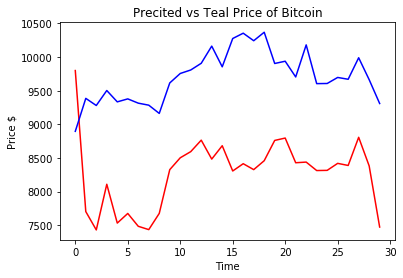

In [14]:
import matplotlib.pyplot as plt

predicted_price = numpy.array(svm_prediction)
real_price = numpy.array(df['price'].tail(prediction_days))

plt.figure()
plt.plot(predicted_price, color = 'red', label = 'Predicted Price')
plt.plot(real_price, color = 'blue', label = 'Real Price')
plt.title("Precited vs Teal Price of Bitcoin")
plt.xlabel('Time')
plt.ylabel('Price $')
plt.show()

In [15]:
numpy.array(svm_prediction)

array([9799.14911831, 7702.83949043, 7430.47772404, 8109.08107216,
       7531.98091672, 7675.28159515, 7484.25726508, 7434.94261214,
       7675.84423496, 8326.00898117, 8502.66804303, 8593.87624206,
       8764.52686103, 8483.11447837, 8682.00080324, 8306.47474222,
       8414.48464065, 8326.61284049, 8459.15008269, 8760.7137278 ,
       8795.78061169, 8428.82553175, 8438.55598066, 8312.95684577,
       8315.76833143, 8419.73862722, 8388.4566612 , 8807.02928893,
       8381.90719221, 7472.92119619])

In [16]:
numpy.array(df['price'].tail(prediction_days))

array([ 8895.78,  9385.69,  9279.81,  9502.37,  9333.77,  9378.09,
        9314.56,  9284.51,  9162.14,  9614.9 ,  9755.66,  9807.54,
        9907.12, 10162.41,  9854.79, 10275.38, 10354.3 , 10242.43,
       10368.53,  9904.17,  9937.67,  9703.93, 10180.65,  9604.72,
        9606.86,  9696.58,  9669.63,  9989.39,  9663.75,  9309.15])